In [ ]:
# default_exp trainers
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FRED
from FRED.trainers import *
from FRED.trainers import Trainer
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device cpu


# 04c01a Trainer: Flow Neighbor Loss and Diffusion Map Regularization on Swiss Roll
> A copy of FRED, tailored with particular loss functions

In [ ]:
# initialize model parameters and layers
from FRED.embed import ManifoldFlowEmbedder
from FRED.trainers import save_embedding_visualization, visualize_points
title = "Flow Neighbor Loss + Diffusion Map Reg"
MFE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
loss_weights = {
            "reconstruction": 0,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1,
            "smoothness": 0,
        }
visualization_functions = [
    save_embedding_visualization,
    visualize_points
]
FREDtrainer = Trainer(FE = MFE, loss_weights=loss_weights, visualization_functions = visualization_functions, device=device, title = title)

# Testing on the Swiss roll

Set sigma =  1.7073193


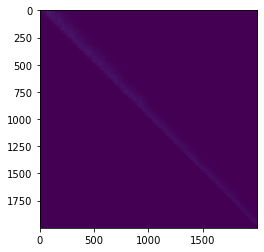

In [ ]:
from FRED.datasets import directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_delayed
from FRED.data_processing import dataloader_from_ndarray
X, flows, labels = directed_swiss_roll_delayed(num_nodes=2000, sigma=0.3, num_spirals=1.5)
# build dataset
dataloader = dataloader_from_ndarray(X,flows,labels)

  0%|          | 0/10 [00:00<?, ?it/s]

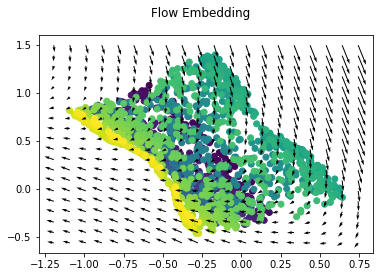

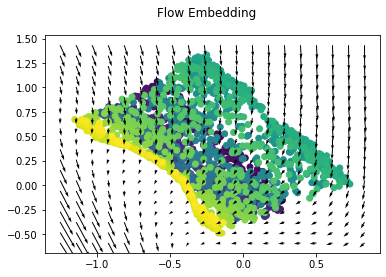

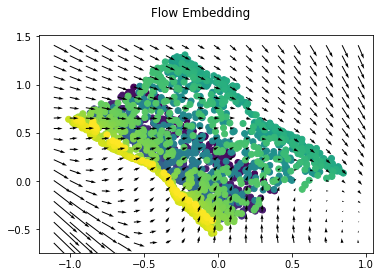

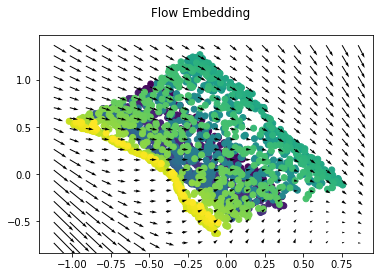

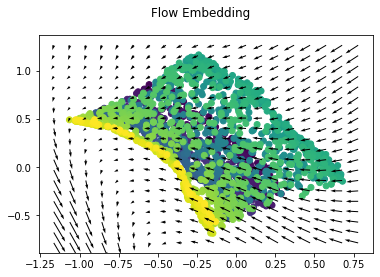

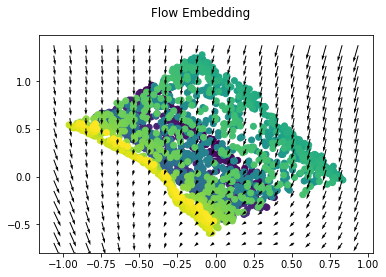

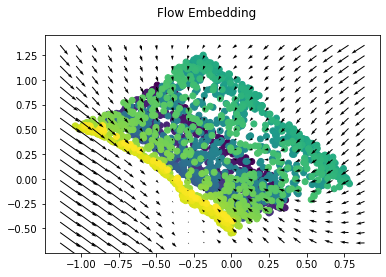

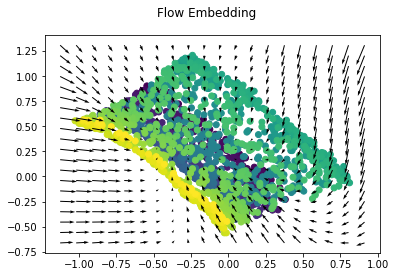

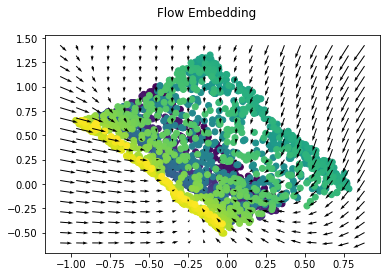

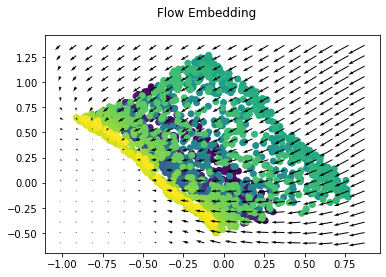

In [ ]:
FREDtrainer.fit(dataloader, n_epochs = 10)

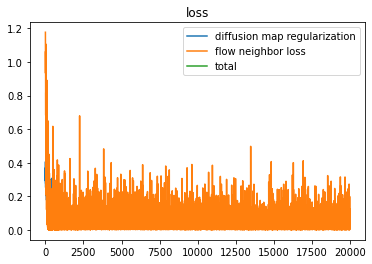

In [ ]:
FREDtrainer.visualize_loss()